In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import csv
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

In [18]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x

In [19]:
model = Network()

In [20]:
type(model)

__main__.Network

In [21]:
for name, param in model.named_parameters():
    print(f"{name}: {param.size()}")

conv1.weight: torch.Size([16, 3, 3, 3])
conv1.bias: torch.Size([16])
conv2.weight: torch.Size([32, 16, 3, 3])
conv2.bias: torch.Size([32])


In [22]:
def get_weight(config):
    AUs_num = config.DATA.CLASS_NUM
    aus = ['AU'+str(au_name) for au_name in config.DATA.AU_LIST]
    with open(config.DATA.SOURCE.TRAIN_LIST, 'r') as f:
        reader = csv.DictReader(f)
        labels = np.array([[int(row[au]) for au in aus] for row in reader])
        all_ = [len(labels)] * AUs_num
        positive = np.sum(labels, 0)

    negative = np.array(all_) - positive

    weight_cls = WeightNorm(positive.tolist(), negative.tolist())
    norm_weight = weight_cls.normalize()
    norm_weight =  np.array(norm_weight)
    norm_weight = norm_weight.tolist()
    norm_weight = torch.FloatTensor(norm_weight)
    return norm_weight

# 修改tensor的维度的函数

In [4]:
import torch

In [25]:
# 1.reshape

x1 = torch.randn((128, 512, 7, 7))
x2 = torch.randn((128, 512, 7, 7))

In [27]:
torch.stack([x1, x2]).shape  # (2, 128, 512, 7, 7)

torch.Size([2, 128, 512, 7, 7])

# 余弦退火算法

In [20]:
model = nn.Linear(256, 5)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.1)

epochs = 100

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

In [21]:
y = [scheduler.get_last_lr()[0]]
print(f"Initial Learning Rate: {scheduler.get_last_lr()[0]:.6f}")
for epoch in range(epochs):
    # 训练模型
    optimizer.step()
    
    # 更新学习率
    scheduler.step()
    
    # 打印当前学习率
    print(f"Epoch {epoch+1}/{epochs}, Learning Rate: {scheduler.get_last_lr()[0]:.6f}")
    y.append(scheduler.get_last_lr()[0])

Initial Learning Rate: 0.100000
Epoch 1/100, Learning Rate: 0.099975
Epoch 2/100, Learning Rate: 0.099901
Epoch 3/100, Learning Rate: 0.099778
Epoch 4/100, Learning Rate: 0.099606
Epoch 5/100, Learning Rate: 0.099384
Epoch 6/100, Learning Rate: 0.099114
Epoch 7/100, Learning Rate: 0.098796
Epoch 8/100, Learning Rate: 0.098429
Epoch 9/100, Learning Rate: 0.098015
Epoch 10/100, Learning Rate: 0.097553
Epoch 11/100, Learning Rate: 0.097044
Epoch 12/100, Learning Rate: 0.096489
Epoch 13/100, Learning Rate: 0.095888
Epoch 14/100, Learning Rate: 0.095241
Epoch 15/100, Learning Rate: 0.094550
Epoch 16/100, Learning Rate: 0.093815
Epoch 17/100, Learning Rate: 0.093037
Epoch 18/100, Learning Rate: 0.092216
Epoch 19/100, Learning Rate: 0.091354
Epoch 20/100, Learning Rate: 0.090451
Epoch 21/100, Learning Rate: 0.089508
Epoch 22/100, Learning Rate: 0.088526
Epoch 23/100, Learning Rate: 0.087506
Epoch 24/100, Learning Rate: 0.086448
Epoch 25/100, Learning Rate: 0.085355
Epoch 26/100, Learning Rate

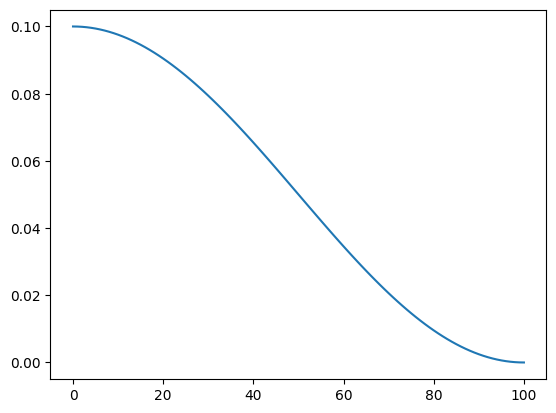

In [22]:
plt.plot(range(epochs+1), y)

# Transforming and augmenting images

In [29]:
import torch
from torchvision.transforms import v2

In [30]:
H, W = 32, 32
img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)

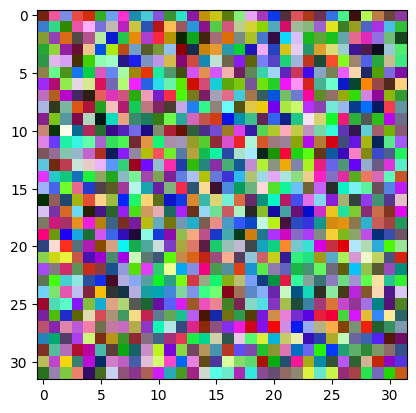

In [39]:
plt.imshow(img.permute(1, 2, 0))